In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from sshtunnel import SSHTunnelForwarder
import psycopg2

In [2]:
# Secure tunnel variables
host = 'ec2-3-17-203-3.us-east-2.compute.amazonaws.com'
ssh_username = 'ubuntu'
ss_private_key = 'awskey.pem'

In [3]:
# Database variables
POSTGRES_USER='drum_running'
password='king_crimson'
database='MA_DOT'
table='uxbridge_chocolog_st'

In [4]:
# Initiate ssh session with drum_running(AWS)
tunnel = SSHTunnelForwarder(
    (host, 22),
    ssh_username=ssh_username,
    ssh_private_key=ss_private_key,
    remote_bind_address=('localhost', 5432),
    local_bind_address=('localhost', 1111),
)

In [5]:
# Function that will execute the SQL command to the server
def pg_data(start_hour, end_hour, table_name):
    tunnel.start()
    
    conn = psycopg2.connect(
        database=database,
        user=POSTGRES_USER,
        password=password,
        host=tunnel.local_bind_host,
        port=tunnel.local_bind_port,
    )
    dt = datetime.today()
    
    cur = conn.cursor()
    
    cur.execute("SELECT eventtime, incl_1, incl_2, incl_3, incl_4, incl_5, incl_6 FROM {6} WHERE received BETWEEN '2019-{0}-{1} {4}:00:00' AND '2019-{2}-{3} {5}:59:00' ORDER BY id".format(
        dt.month, 
        dt.day -2, 
        dt.month, 
        dt.day -1,
        start_hour,
        end_hour,
        table_name
    ))
    
    data = cur.fetchall()
    
    conn.close()
    
    tunnel.stop()
    
    return data


In [6]:
def convert_from_timestamp(series_point):
    timestamp = datetime.fromtimestamp(series_point)
    return timestamp

In [7]:
# Function that will format the data from PostgreSQL into an organized data structure
def parsed_inc_plot(result):
    inc1 = []
    inc2 = []
    inc3 = []
    inc4 = []
    inc5 = []
    inc6 = []
    received = []

    for i in range(len(result)):
        inc1.append(result[i][1])
        inc2.append(result[i][2])
        inc3.append(result[i][3])
        inc4.append(result[i][4])
        inc5.append(result[i][5])
        inc6.append(result[i][6])
        
        received.append(convert_from_timestamp(result[i][0]))
        
    return { 
        "inc1": inc1, 
        "inc2": inc2, 
        "inc3": inc3, 
        "inc4": inc4, 
        "inc5": inc5, 
        "inc6": inc6, 
        "received": received 
    }



In [8]:
result = pg_data("18", "17", table)

In [9]:
parsed_inc_data = parsed_inc_plot(result)

In [10]:
# Get data from server, parse, format and instantiate linear chart library configuration
plt.rcParams["figure.figsize"] = (50, 10)
inc = plt

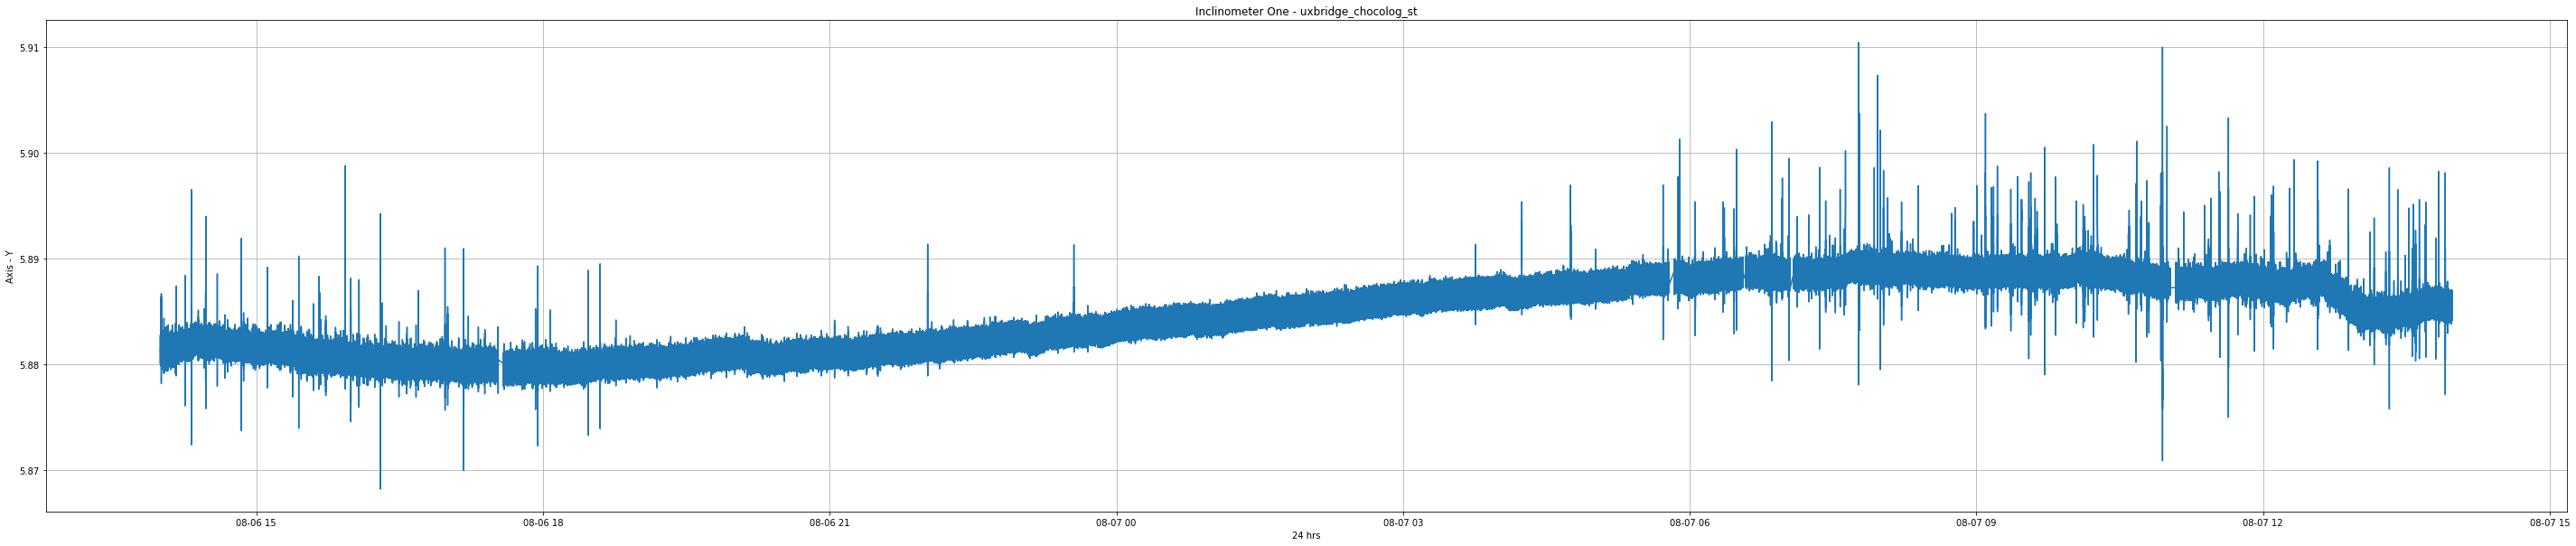

In [12]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc1'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer One - {}".format(table))
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


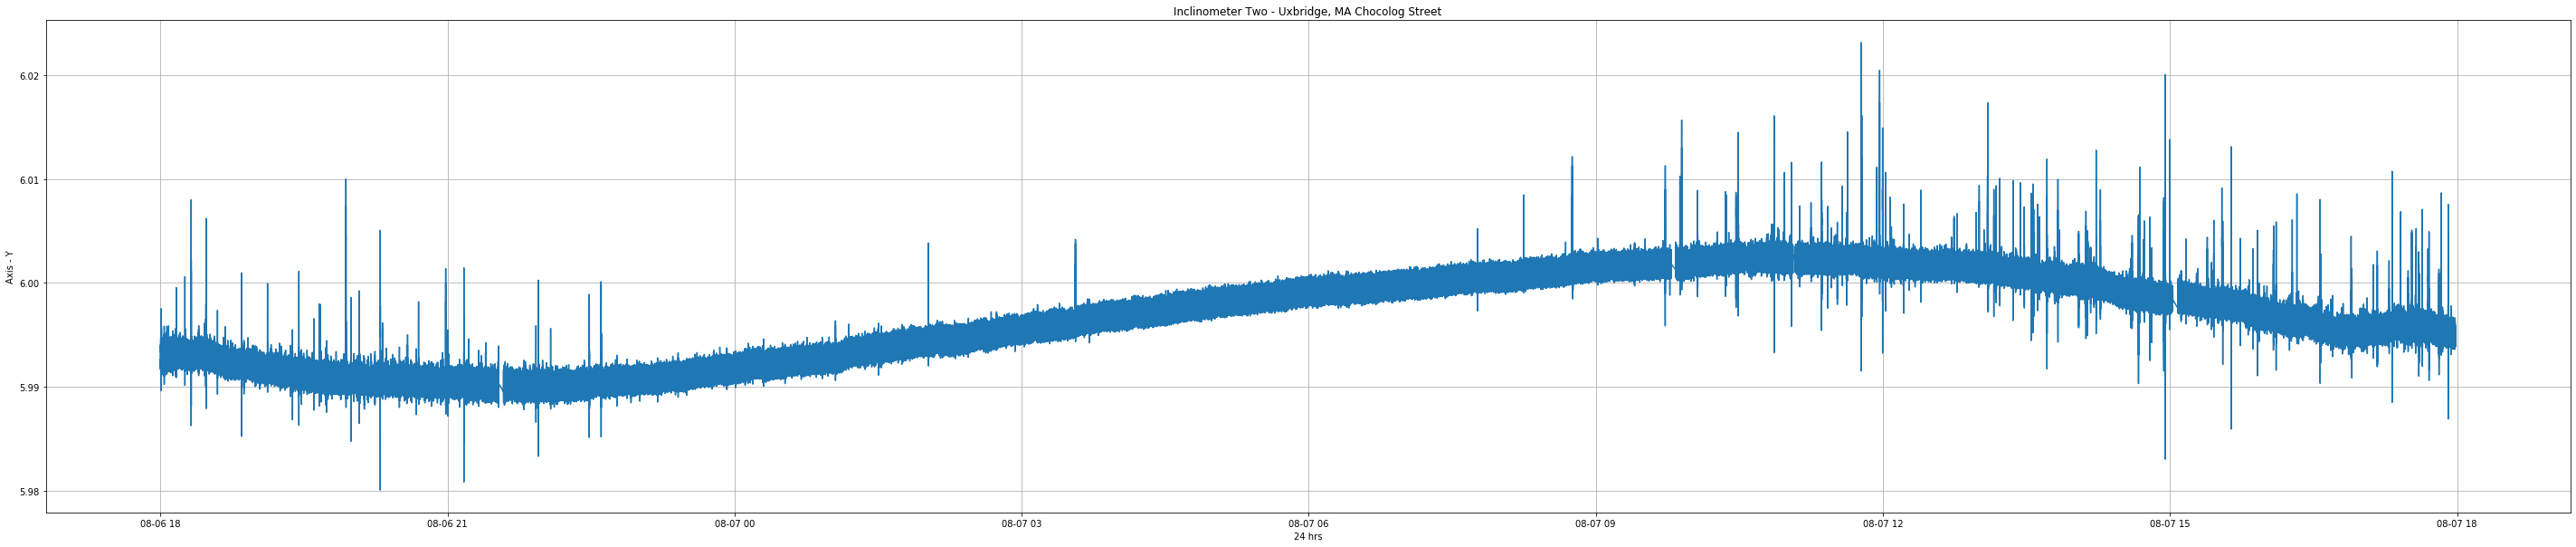

In [9]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc2'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer Two - {}".format(table)")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


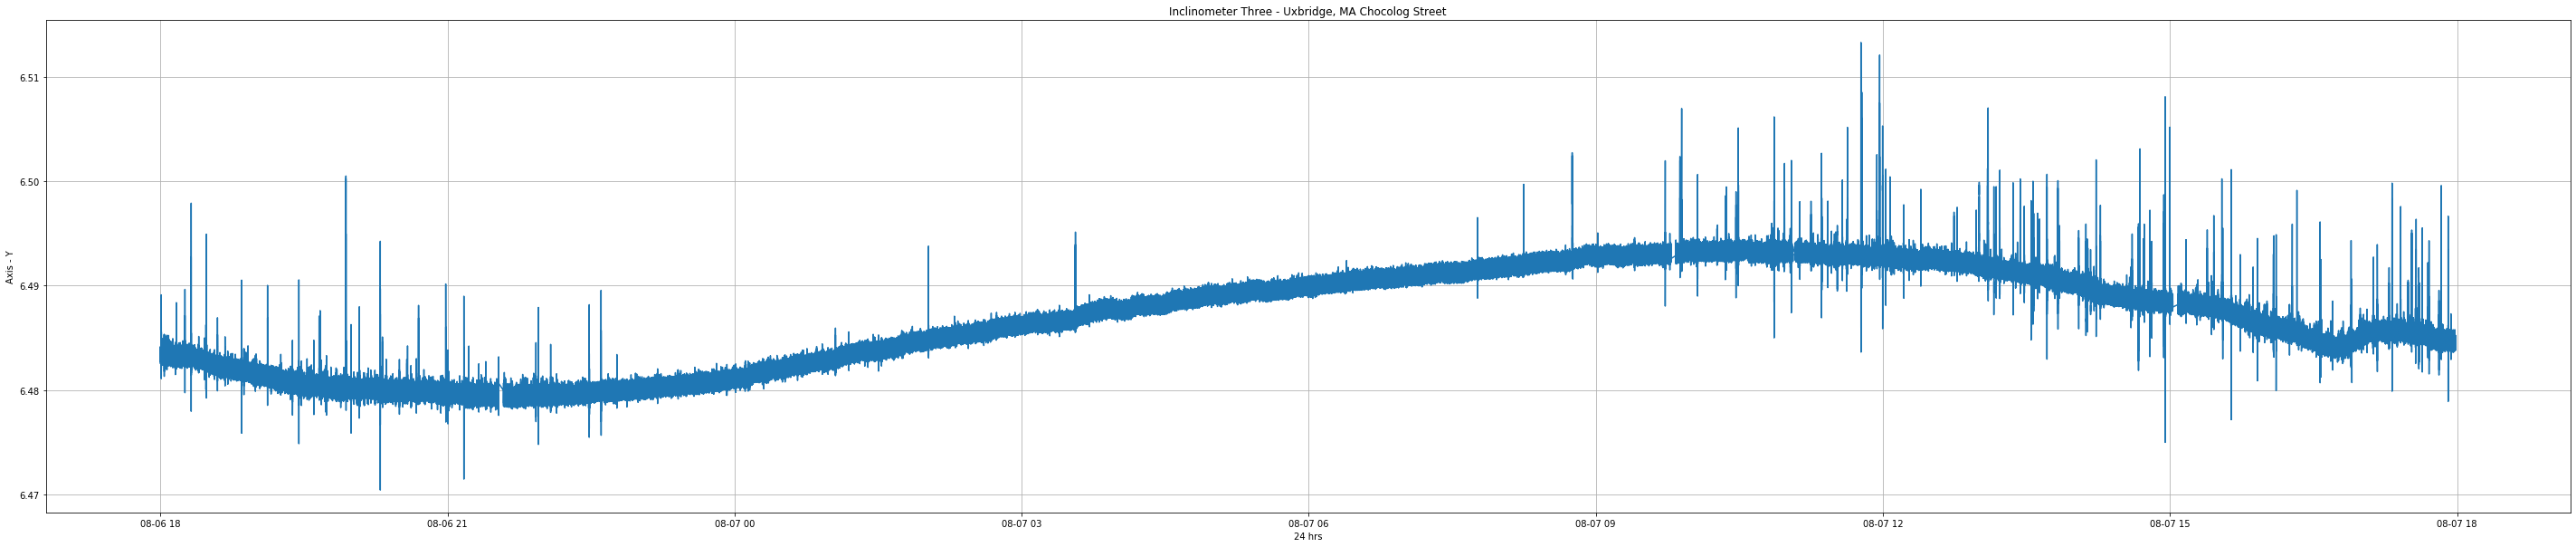

In [10]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc3'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer Three - {}".format(table)")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


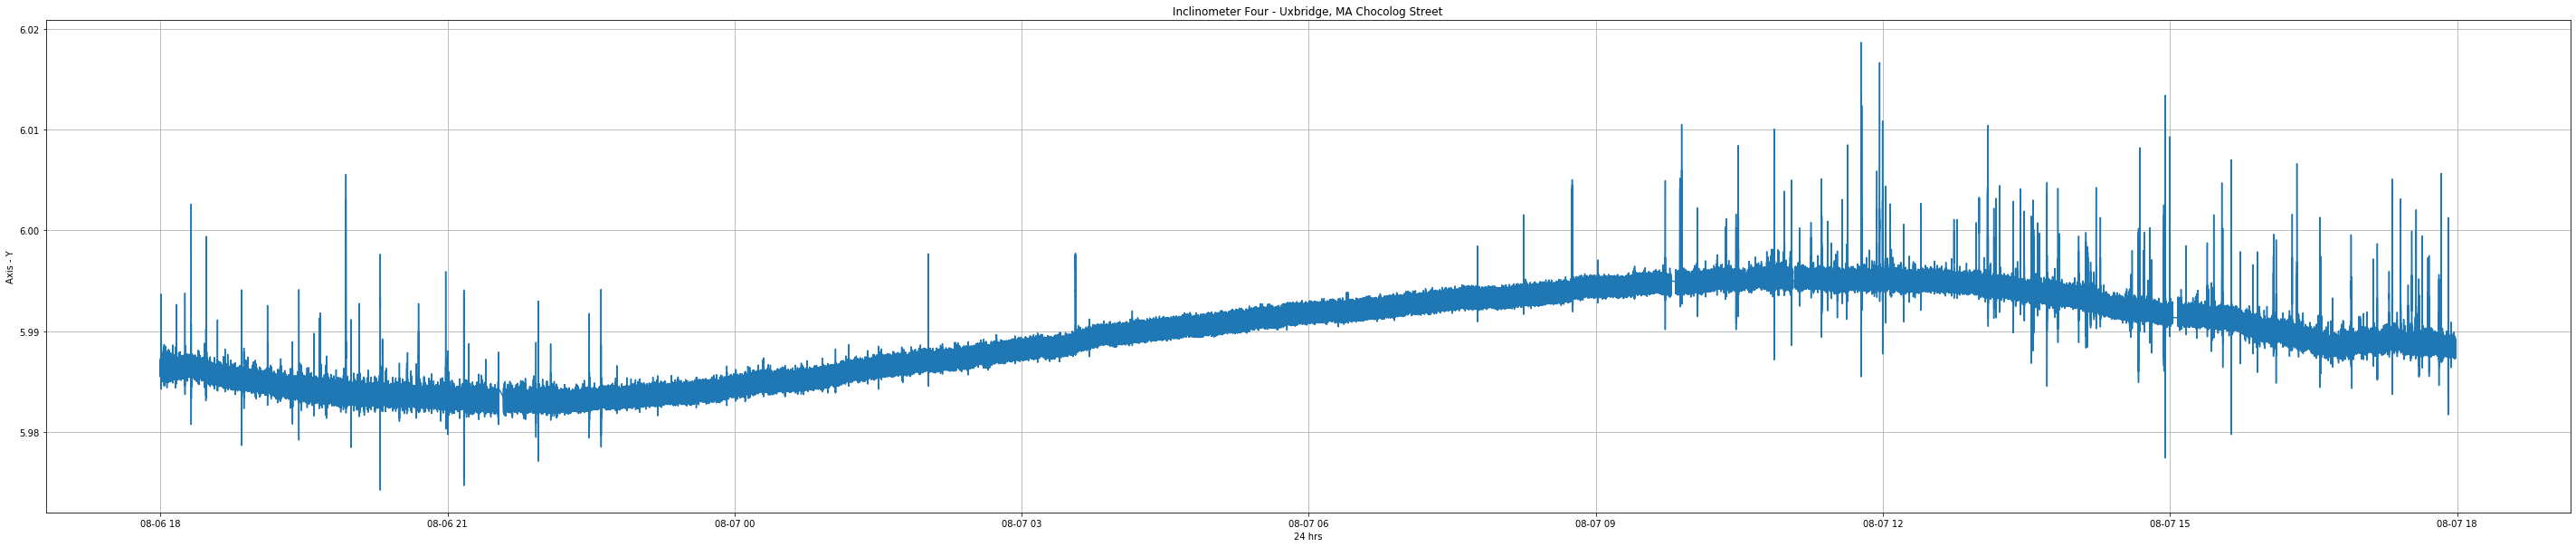

In [11]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc4'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer Four - {}".format(table)")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


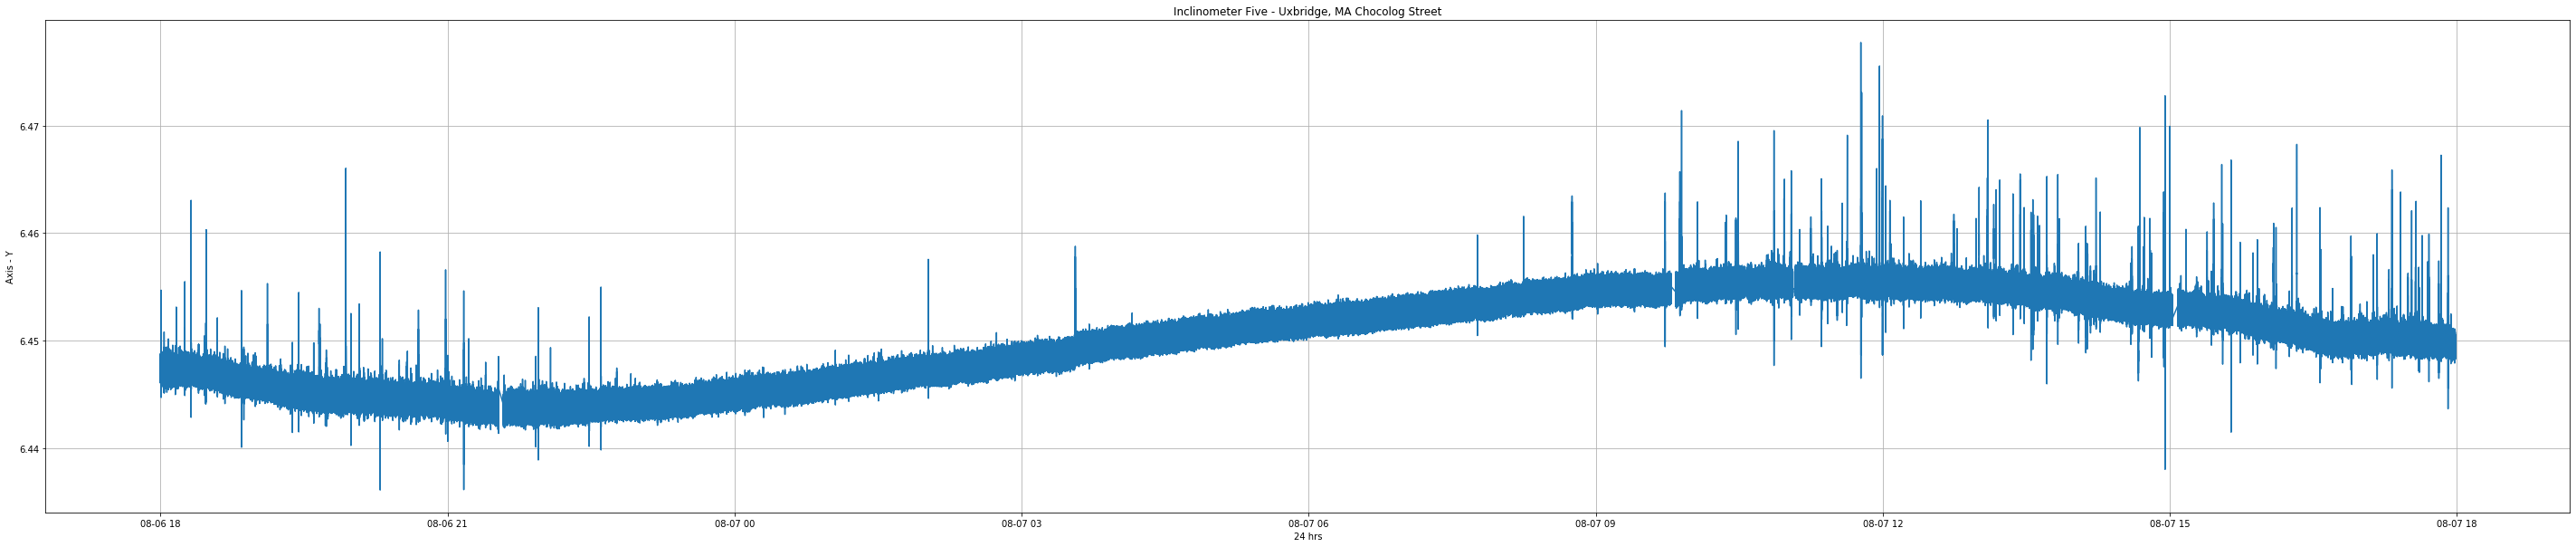

In [12]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc5'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer Five - {}".format(table)")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()


In [ ]:
inc.plot(parsed_inc_data['received'], parsed_inc_data['inc6'])
inc.ylabel('Axis - Y')
inc.title("Inclinometer Six - {}".format(table)")
inc.xlabel('24 hrs')
inc.grid(True)

inc.show()